In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
# from mpl_toolkits.mplot3d import Axes3D
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm
from scipy.interpolate import interp1d

# VAE 1D + 2D (spectrogram)

### Padded

In [2]:
folder_name = "AOI_100hz_50ms_pre_end_bin" # stacked to 27

In [35]:
data_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "data")
label_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "labels")

data_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])
data_list = []
label_list = []

for file in tqdm(data_files, desc="Loading data and labels"):
    # read in data
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    data_list.append(data)
    
    # read in label
    label_path = os.path.join(label_dir, file)
    label = np.load(label_path)
    label_list.append(label)

max_length = max(data.shape[1] for data in data_list)
assert all(data.shape[0] == 75 for data in data_list), "All data should have 75 neurons"

# padding
padded_data = [np.pad(data, ((0, 0), (0, max_length - data.shape[1])), mode='constant', constant_values=0) for data in data_list]

# convert to tensors
padded_data = [torch.tensor(data, dtype=torch.float32) for data in padded_data]
labels = [torch.tensor(label, dtype=torch.long).unsqueeze(0) for label in label_list]

# stack
stacked_data = torch.stack(padded_data, dim=0)
stacked_labels = torch.cat(labels, dim=0)

print(f"Shape of stacked data: {stacked_data.shape}")
print(f"Shape of stacked labels: {stacked_labels.shape}")

Loading data and labels:  24%|██▍       | 836/3459 [00:03<00:10, 257.36it/s]


KeyboardInterrupt: 

In [5]:
# Get indices where labels are 2
mask = (stacked_labels == 2)
indices = torch.where(mask)[0]

# Filter data using the mask
stacked_data = stacked_data[indices]
stacked_labels = stacked_labels[indices]

print(f"Shape of filtered data: {filtered_data.shape}")
print(f"Shape of filtered labels: {filtered_labels.shape}")


NameError: name 'filtered_data' is not defined

### with label

In [2]:
yourLabel = 2 # or myLabel? 0.O
all_data = False
folder_name = "AOI_100hz_50ms_pre_end_bin" # stacked to 27

In [6]:
data_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "data")
label_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "labels")

data_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.npy')])
data_list = []
label_list = []

for file in tqdm(data_files, desc="Loading data and labels"):
    # read in data
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    
    # read in label
    label_path = os.path.join(label_dir, file)
    label = np.load(label_path)

    if label == yourLabel:
        data_list.append(data)
        label_list.append(label)



max_length = max(data.shape[1] for data in data_list)
assert all(data.shape[0] == 75 for data in data_list), "All data should have 75 neurons"

target_time_points = max_length
interp_data_list = []

for data in data_list:
    orig_times = np.linspace(0, 1, data.shape[1])
    target_times = np.linspace(0, 1, target_time_points)
    
    # interpolate for each neuron
    interp_data = np.zeros((data.shape[0], target_time_points))
    for i in range(data.shape[0]):
        interp_func = interp1d(orig_times, data[i], kind='linear', bounds_error=False,
                               fill_value=(data[i, 0], data[i, -1]))
        interp_data[i] = interp_func(target_times)
    
    interp_data_list.append(interp_data)

# tensor
padded_data = [torch.tensor(data, dtype=torch.float32) for data in interp_data_list]
labels = [torch.tensor(label, dtype=torch.long).unsqueeze(0) for label in label_list]

# stack
stacked_data = torch.stack(padded_data, dim=0)
stacked_labels = torch.cat(labels, dim=0)

print(f"Shape of stacked data: {stacked_data.shape}")
print(f"Shape of stacked labels: {stacked_labels.shape}")

Loading data and labels:   0%|          | 0/3459 [00:00<?, ?it/s]

Loading data and labels:  22%|██▏       | 763/3459 [00:04<00:14, 187.14it/s]


KeyboardInterrupt: 

### warpped without label

In [3]:
all_data = True
folder_name = "AOI_100hz_50ms_pre_end_bin" # stacked to 27

In [4]:
data_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "data")
label_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "labels")

# Get files and sort numerically based on filename
data_files = []
for f in os.listdir(data_dir):
    if f.endswith('.npy'):
        num = int(f.split('.')[0])  # Extract number from filename like '0000.npy'
        data_files.append((num, f))

data_files.sort()  # Sort based on the number
data_files = [f[1] for f in data_files]  # Get just the filenames

data_list = []
label_list = []

for file in tqdm(data_files, desc="Loading data and labels"):
    # read in data
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    
    # read in label
    label_path = os.path.join(label_dir, file)
    label = np.load(label_path)

    # Add all data and labels without filtering
    data_list.append(data)
    label_list.append(label)

max_length = max(data.shape[1] for data in data_list)
assert all(data.shape[0] == 75 for data in data_list), "All data should have 75 neurons"

target_time_points = max_length
interp_data_list = []

for data in data_list:
    orig_times = np.linspace(0, 1, data.shape[1])
    target_times = np.linspace(0, 1, target_time_points)
    
    # interpolate for each neuron
    interp_data = np.zeros((data.shape[0], target_time_points))
    for i in range(data.shape[0]):
        interp_func = interp1d(orig_times, data[i], kind='linear', bounds_error=False,
                               fill_value=(data[i, 0], data[i, -1]))
        interp_data[i] = interp_func(target_times)
    
    interp_data_list.append(interp_data)

# tensor
padded_data = [torch.tensor(data, dtype=torch.float32) for data in interp_data_list]
labels = [torch.tensor(label, dtype=torch.long).unsqueeze(0) for label in label_list]

# stack
stacked_data = torch.stack(padded_data, dim=0)
stacked_labels = torch.cat(labels, dim=0)

print(f"Shape of stacked data: {stacked_data.shape}")
print(f"Shape of stacked labels: {stacked_labels.shape}")

Loading data and labels:   0%|          | 0/3459 [00:00<?, ?it/s]

Loading data and labels: 100%|██████████| 3459/3459 [00:19<00:00, 175.18it/s]


Shape of stacked data: torch.Size([3459, 75, 27])
Shape of stacked labels: torch.Size([3459])


In [22]:
# Load saved labels
saved_labels = torch.load(os.path.join('training_data', 'all_labels.pt'), weights_only=True)

# Compare shapes
print(f"Shape of current labels: {stacked_labels.shape}")
print(f"Shape of saved labels: {saved_labels.shape}")

# Check if labels are identical
labels_match = torch.equal(stacked_labels, saved_labels)
print(f"\nLabels are identical: {labels_match}")

if not labels_match:
    print("WARNING: Current labels differ from saved labels!")

Shape of current labels: torch.Size([3459])
Shape of saved labels: torch.Size([3459])

Labels are identical: True


In [23]:
# Save labels and data to files
# torch.save(stacked_labels, os.path.join('training_data', 'all_labels.pt'))
torch.save(stacked_data, os.path.join('training_data', 'data_warped_neural.pt'))

### sample time

In [52]:
data_dir = os.path.join("M:", "neuro2voc", "task-5", "AOI_30kHz_60ms_pre_30ms_segment_overlap_0.33")
data_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.pt')])
data_list = []

for file in tqdm(data_files, desc="Loading data"):
    data_path = os.path.join(data_dir, file)
    data = torch.load(data_path, weights_only=True)
    data_list.append(data)

stacked_data = torch.stack(data_list, dim=0)
print(f"Shape of stacked data: {stacked_data.shape}")

Loading data:   0%|          | 0/24499 [00:00<?, ?it/s]

Loading data: 100%|██████████| 24499/24499 [03:11<00:00, 128.08it/s]


Shape of stacked data: torch.Size([24499, 75, 900])


In [53]:
max_length = 900

### No warping

In [2]:
all_data = True
no_warping = True
folder_name = "AOI_100hz_50ms_pre_end_bin" # stacked to 27

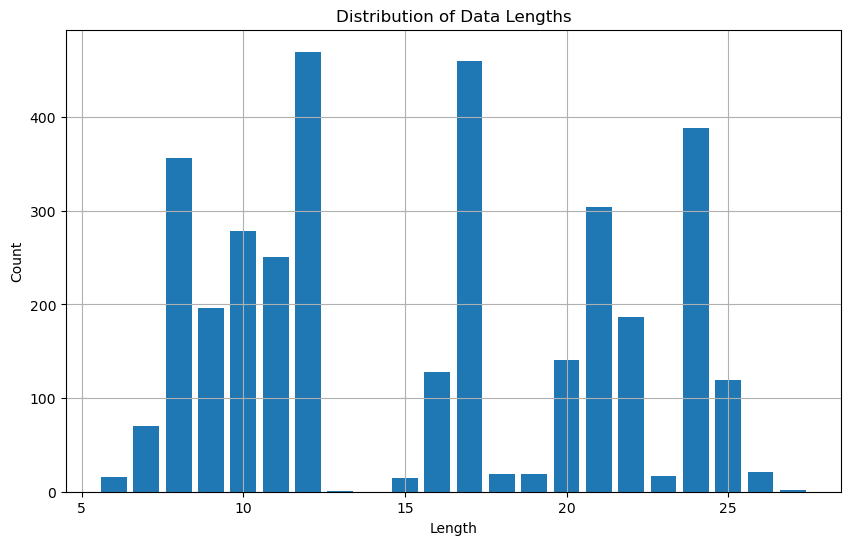

Minimum length: 6
Maximum length: 27
Mean length: 15.55
Median length: 16.00


Loading data and labels: 100%|██████████| 3459/3459 [00:00<00:00, 3563.52it/s]

Dropped 86 samples with lengths < 8
Labels of dropped samples: (array([6]), array([86], dtype=int64))

All dropped labels:
[array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6), array(6)]
Shape of stacked

In [11]:
data_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "data")
label_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "labels")

# Get files and sort numerically based on filename
data_files = []
for f in os.listdir(data_dir):
    if f.endswith('.npy'):
        num = int(f.split('.')[0])  # Extract number from filename like '0000.npy'
        data_files.append((num, f))

data_files.sort()  # Sort based on the number
data_files = [f[1] for f in data_files]  # Get just the filenames

data_list = []
label_list = []
lengths = []

# First pass to collect lengths and find minimum
min_length = float('inf')
for file in data_files:
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    length = data.shape[1]
    lengths.append(length)
    min_length = min(min_length, length)

# Plot length distribution as bar plot
plt.figure(figsize=(10, 6))
unique_lengths = sorted(list(set(lengths)))
counts = [lengths.count(l) for l in unique_lengths]
plt.bar(unique_lengths, counts)
plt.title('Distribution of Data Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print(f"Minimum length: {min_length}")
print(f"Maximum length: {max(lengths)}")
print(f"Mean length: {np.mean(lengths):.2f}")
print(f"Median length: {np.median(lengths):.2f}")

min_length = 8
max_length = 8

# Second pass to load and cut data
dropped_indices = []
dropped_labels = []

for i, file in enumerate(tqdm(data_files, desc="Loading data and labels")):
    # read in data
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    
    # Check if data length is at least min_length
    if data.shape[1] < min_length:
        # read label to record what was dropped
        label_path = os.path.join(label_dir, file)
        label = np.load(label_path)
        dropped_indices.append(i)
        dropped_labels.append(label)
        continue
        
    # Cut to fixed length
    data = data[:, :min_length]
    
    # read in label
    label_path = os.path.join(label_dir, file)
    label = np.load(label_path)

    data_list.append(data)
    label_list.append(label)

print(f"Dropped {len(dropped_indices)} samples with lengths < {min_length}")
print(f"Labels of dropped samples: {np.unique(dropped_labels, return_counts=True)}")
print("\nAll dropped labels:")
print(dropped_labels)

assert all(data.shape[0] == 75 for data in data_list), "All data should have 75 neurons"
assert all(data.shape[1] == min_length for data in data_list), "All data should have same length"

# Convert to tensors
padded_data = [torch.tensor(data, dtype=torch.float32) for data in data_list]
labels = [torch.tensor(label, dtype=torch.long).unsqueeze(0) for label in label_list]

# Stack
stacked_data = torch.stack(padded_data, dim=0)
stacked_labels = torch.cat(labels, dim=0)

print(f"Shape of stacked data: {stacked_data.shape}")
print(f"Shape of stacked labels: {stacked_labels.shape}")

# max_length = min_length # just for the parameters
# # Second pass to load and cut data
# for file in tqdm(data_files, desc="Loading data and labels"):
#     # read in data
#     data_path = os.path.join(data_dir, file)
#     data = np.load(data_path)
    
#     # Cut to minimum length
#     data = data[:, :min_length]
    
#     # read in label
#     label_path = os.path.join(label_dir, file)
#     label = np.load(label_path)

#     data_list.append(data)
#     label_list.append(label)

# assert all(data.shape[0] == 75 for data in data_list), "All data should have 75 neurons"
# assert all(data.shape[1] == min_length for data in data_list), "All data should have same length"

# # Convert to tensors
# padded_data = [torch.tensor(data, dtype=torch.float32) for data in data_list]
# labels = [torch.tensor(label, dtype=torch.long).unsqueeze(0) for label in label_list]

# # Stack
# stacked_data = torch.stack(padded_data, dim=0)
# stacked_labels = torch.cat(labels, dim=0)

# print(f"Shape of stacked data: {stacked_data.shape}")
# print(f"Shape of stacked labels: {stacked_labels.shape}")

#### No warping and cut directly from 6

In [3]:
data_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "data")
label_dir = os.path.join("M:", "neuro2voc", "task-5", folder_name, "labels")

# Get files and sort numerically based on filename
data_files = []
for f in os.listdir(data_dir):
    if f.endswith('.npy'):
        num = int(f.split('.')[0])  # Extract number from filename like '0000.npy'
        data_files.append((num, f))

data_files.sort()  # Sort based on the number
data_files = [f[1] for f in data_files]  # Get just the filenames

data_list = []
label_list = []

# First pass to find minimum length
min_length = float('inf')
for file in data_files:
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    min_length = min(min_length, data.shape[1])

max_length = min_length # just for the parameters
# Second pass to load and cut data
for file in tqdm(data_files, desc="Loading data and labels"):
    # read in data
    data_path = os.path.join(data_dir, file)
    data = np.load(data_path)
    
    # Cut to minimum length
    data = data[:, :min_length]
    
    # read in label
    label_path = os.path.join(label_dir, file)
    label = np.load(label_path)

    data_list.append(data)
    label_list.append(label)

assert all(data.shape[0] == 75 for data in data_list), "All data should have 75 neurons"
assert all(data.shape[1] == min_length for data in data_list), "All data should have same length"

# Convert to tensors
padded_data = [torch.tensor(data, dtype=torch.float32) for data in data_list]
labels = [torch.tensor(label, dtype=torch.long).unsqueeze(0) for label in label_list]

# Stack
stacked_data = torch.stack(padded_data, dim=0)
stacked_labels = torch.cat(labels, dim=0)

print(f"Shape of stacked data: {stacked_data.shape}")
print(f"Shape of stacked labels: {stacked_labels.shape}")

Loading data and labels: 100%|██████████| 3459/3459 [00:02<00:00, 1273.16it/s]

Shape of stacked data: torch.Size([3459, 75, 6])
Shape of stacked labels: torch.Size([3459])


In [ ]:
### Last Attempt - moving window size of 10 with padding

In [ ]:
all_data = True
no_warping = True
folder_name = "AOI_100hz_50ms_pre_end_bin" # stacked to 27

In [29]:
# Define paths to data directories
base_path = "M:/neuro2voc/task-5/AOI_250Hz_segment_step_size_1"
neural_dir = os.path.join(base_path, "neural")
label_dir = os.path.join(base_path, "label")

# Get files and sort numerically based on filename
data_files = []
for f in os.listdir(neural_dir):
    if f.endswith('.pt'):
        num = int(f.split('.')[0])  # Extract number from filename
        data_files.append((num, f))

data_files.sort()  # Sort based on the number
data_files = [f[1] for f in data_files]  # Get just the filenames

data_list = []
label_list = []
for file in tqdm(data_files, desc="Loading data"):
    data_path = os.path.join(neural_dir, file)
    label_path = os.path.join(label_dir, file)
    
    # Load with weights_only=True to avoid pickle security warning
    data = torch.load(data_path, weights_only=True).float()
    label = torch.load(label_path, weights_only=True).float()
    
    data_list.append(data)
    label_list.append(label)

# Stack all data and labels
stacked_data = torch.stack(data_list, dim=0)
stacked_labels = torch.stack(label_list, dim=0)

print(f"Shape of stacked data: {stacked_data.shape}")
print(f"Shape of stacked labels: {stacked_labels.shape}")

Loading data:  60%|██████    | 80096/132577 [19:52<12:06, 72.24it/s] 

In [ ]:
max_length = 10

# Model

In [26]:
class VAE(nn.Module):
    def __init__(self, input_channels, input_length, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.input_channels = input_channels
        self.input_length = input_length
        
        self.encoder = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * input_length, hidden_dim),
            nn.ReLU()
        )
        
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 64 * input_length),
            nn.ReLU(),
            nn.Unflatten(1, (64, input_length)),
            nn.ConvTranspose1d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(32, input_channels, kernel_size=3, padding=1)
        )
        
    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def loss_function(self, recon_x, x, mu, logvar):
        MSE = F.mse_loss(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return MSE + 0.1 * KLD

In [12]:
class VAE_1D_noWarping(nn.Module):
    def __init__(self, input_channels=75, input_length=6, hidden_dim=256, latent_dim=32):
        super(VAE_1D_noWarping, self).__init__()
        
        self.flatten_dim = 64 * input_length  # 64 * 6 = 384
        
        self.encoder = nn.Sequential(
            nn.Conv1d(input_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(self.flatten_dim, hidden_dim),
            nn.ReLU()
        )
        
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, self.flatten_dim),
            nn.ReLU(),
            nn.Unflatten(1, (64, input_length)),
            nn.ConvTranspose1d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose1d(32, input_channels, kernel_size=3, padding=1)
        )
        
    def encode(self, x):
        h = self.encoder(x)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        return self.decoder(z)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def loss_function(self, recon_x, x, mu, logvar):
        MSE = F.mse_loss(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return MSE + 0.1 * KLD

In [28]:
class VAE2D(nn.Module):
    def __init__(self, input_channels=1, height=75, width=27, hidden_dim=256, latent_dim=32):
        super(VAE2D, self).__init__()
        self.target_width = width
        self.target_height = height
        
        h1, w1 = (height + 2*1 - 3)//2 + 1, (width + 2*1 - 3)//2 + 1     # 38, 14
        h2, w2 = (h1 + 2*1 - 3)//2 + 1, (w1 + 2*1 - 3)//2 + 1           # 19, 7
        h3, w3 = (h2 + 2*1 - 3)//2 + 1, (w2 + 2*1 - 3)//2 + 1           # 10, 4

        # final shape
        self.final_h = h3
        self.final_w = w3
        self.final_channels = 64
        self.flatten_size = self.final_channels * self.final_h * self.final_w
        print(f"Flatten size: {self.flatten_size}")  
        
        # Encoder
        self.encoder_conv = nn.Sequential(
            # Input processing
            nn.BatchNorm2d(input_channels),
            
            # Block 1: (1, 75, 27) -> (16, 75, 27) -> (16, 38, 14)
            nn.Conv2d(input_channels, 16, 3, 1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 16, 3, 2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            
            # Block 2: (16, 38, 14) -> (32, 38, 14) -> (32, 19, 7)
            nn.Conv2d(16, 32, 3, 1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, 2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            # Block 3: (32, 19, 7) -> (64, 19, 7) -> (64, 10, 4)
            nn.Conv2d(32, 64, 3, 1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, 2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
        )
        
        # Flatten layer
        self.flatten = nn.Flatten()
        
        # Feature processing
        self.encoder_fc = nn.Sequential(
            nn.Linear(self.flatten_size, 1024),  
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
        )
        
        # Latent space
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)
        
        # Decoder
        self.decoder_fc = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1024),
            nn.ReLU(),
            nn.Linear(1024, self.flatten_size),
            nn.ReLU(),
        )
        
        self.decoder_conv = nn.Sequential(
            # Block 1: (64, 10, 4) -> (32, 19, 7)
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=0),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            
            # Block 2: (32, 19, 7) -> (16, 38, 14)
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            
            # Final: (16, 38, 14) -> (1, 75, 27)
            nn.ConvTranspose2d(16, input_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
        )
    
    def encode(self, x):
        if len(x.shape) == 3:
            x = x.unsqueeze(1)
            
        # Ensure input has target dimensions
        if x.shape[2] != self.target_height or x.shape[3] != self.target_width:
            x = F.interpolate(x, size=(self.target_height, self.target_width), mode='bilinear', align_corners=False)
            
        h = self.encoder_conv(x)
        h = self.flatten(h)
        h = self.encoder_fc(h)
        return self.fc_mu(h), self.fc_logvar(h)
    
    def decode(self, z):
        h = self.decoder_fc(z)
        h = h.view(-1, self.final_channels, self.final_h, self.final_w)
        h = self.decoder_conv(h)
        return h
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        # Ensure input has correct shape
        if len(x.shape) == 3:
            x = x.unsqueeze(1)
        
        # Ensure input has target dimensions
        if x.shape[2] != self.target_height or x.shape[3] != self.target_width:
            x = F.interpolate(x, size=(self.target_height, self.target_width), mode='bilinear', align_corners=False)
        
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        decoded = self.decode(z)
        
        # Ensure decoded output matches target dimensions
        if decoded.shape[2] != self.target_height or decoded.shape[3] != self.target_width:
            decoded = F.interpolate(decoded, size=(self.target_height, self.target_width), mode='bilinear', align_corners=False)
        
        return decoded, mu, logvar

    def loss_function(self, recon_x, x, mu, logvar, beta=0.1):
        if len(x.shape) == 3:
            x = x.unsqueeze(1)
        
        # Ensure both tensors have target dimensions
        if x.shape[2] != self.target_height or x.shape[3] != self.target_width:
            x = F.interpolate(x, size=(self.target_height, self.target_width), mode='bilinear', align_corners=False)
        if recon_x.shape[2] != self.target_height or recon_x.shape[3] != self.target_width:
            recon_x = F.interpolate(recon_x, size=(self.target_height, self.target_width), mode='bilinear', align_corners=False)
        
        recon_loss = F.mse_loss(recon_x, x, reduction='mean')
        kld_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        total_loss = recon_loss + beta * kld_loss
        
        return total_loss, recon_loss, kld_loss

# Parameters

### Device

In [13]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: cuda


### Dataloader

In [14]:
dataset = TensorDataset(stacked_data)
# dataset = TensorDataset(stacked_data, stacked_labels)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

In [ ]:
# Calculate split point at 80% of data
split_idx = int(0.8 * len(stacked_data))

# Split data and labels into train and test sets
train_data = stacked_data[:split_idx]
train_labels = stacked_labels[:split_idx] # labels are not used for training
test_data = stacked_data[split_idx:]
test_labels = stacked_labels[split_idx:] # labels are not used for testing
# labels are only used for visualization

# Create datasets
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Create dataloaders 
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

### Hyperparameters

In [15]:
learning_rate = 3e-4
num_epochs = 100000
patience = 5000
min_delta = 1e-5

In [16]:
max_length

8

### Model and optimizer

In [17]:
choice = "1D"

In [18]:
if choice == "2D":
    model = VAE2D(
        input_channels=1,
        height=75,
        width=max_length,
        hidden_dim=256,
        latent_dim=32
    ).to(device)
elif choice == "1D":
    model = VAE(
        input_channels=75,
        input_length=max_length,
        hidden_dim=256,
        latent_dim=32
    ).to(device)

NameError: name 'VAE' is not defined

In [19]:
model = VAE_1D_noWarping(
    input_channels=75,
    input_length=max_length,
    hidden_dim=256,
    latent_dim=32
).to(device)

In [20]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)

### Early stopping

In [21]:
best_loss = float('inf')
patience_counter = 1000
best_model = None

### Training function

In [22]:
def train(model, train_loader, num_epochs, learning_rate, patience, min_delta, device):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    best_loss = float('inf')
    patience_counter = 0
    best_model = None

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            x = batch[0].float().to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(x)
            loss = model.loss_function(recon_batch, x, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            if torch.isnan(loss) or torch.isinf(loss):
                print("Loss is NaN or Inf. Stopping training.")
                return model, epoch

        avg_loss = total_loss / len(train_loader.dataset)
        print(f'Epoch {epoch + 1}, Loss: {avg_loss:.4f}')

        # Early stopping check
        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
            best_model = model.state_dict()
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs")
            break

    # Load the best model
    if best_model is not None:
        model.load_state_dict(best_model)

    return model, epoch

In [23]:
def train2D(model, train_loader, num_epochs, learning_rate, patience=5, min_delta=0.01, device='cuda'):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    best_loss = float('inf')
    patience_counter = 0
    best_model = None  # Added to match 1D version
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        total_recon_loss = 0
        total_kld_loss = 0
        
        for batch in train_loader:
            x = batch[0].float().to(device)
            optimizer.zero_grad()
            
            recon_batch, mu, logvar = model(x)
            total_loss_batch, recon_loss_batch, kld_loss_batch = model.loss_function(recon_batch, x, mu, logvar)
            
            # Check for NaN/Inf like in 1D version
            if torch.isnan(total_loss_batch) or torch.isinf(total_loss_batch):
                print("Loss is NaN or Inf. Stopping training.")
                return model, epoch
            
            total_loss_batch.backward()
            optimizer.step()
            
            total_loss += total_loss_batch.item()
            total_recon_loss += recon_loss_batch.item()
            total_kld_loss += kld_loss_batch.item()
        
        # Calculate average loss per sample instead of per batch
        avg_loss = total_loss / len(train_loader.dataset)
        avg_recon_loss = total_recon_loss / len(train_loader.dataset)
        avg_kld_loss = total_kld_loss / len(train_loader.dataset)
        
        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Loss: {avg_loss:.4f}, '
              f'Recon Loss: {avg_recon_loss:.4f}, '
              f'KLD Loss: {avg_kld_loss:.4f}')
        
        # Early stopping check (matching 1D version)
        if avg_loss < best_loss - min_delta:
            best_loss = avg_loss
            patience_counter = 0
            best_model = model.state_dict()
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping after {epoch + 1} epochs')
                break
    
    # Load the best model (matching 1D version)
    if best_model is not None:
        model.load_state_dict(best_model)
    
    return model, epoch

# Train

In [24]:
if choice == "1D":
    model, epochs_trained = train(model, dataloader, num_epochs, learning_rate, 100, min_delta, device)
elif choice == "2D":
    model, epochs_trained = train2D(model, dataloader, num_epochs, learning_rate, patience, min_delta, device)
print(f"Training completed after {epochs_trained + 1} epochs.")

Epoch 1, Loss: 317.7021
Epoch 2, Loss: 242.9582
Epoch 3, Loss: 198.2659
Epoch 4, Loss: 190.5606
Epoch 5, Loss: 188.6249
Epoch 6, Loss: 187.5544
Epoch 7, Loss: 186.8544
Epoch 8, Loss: 186.3975
Epoch 9, Loss: 186.1545
Epoch 10, Loss: 185.9272
Epoch 11, Loss: 185.7967
Epoch 12, Loss: 185.7096
Epoch 13, Loss: 185.5951
Epoch 14, Loss: 185.5143
Epoch 15, Loss: 185.4370
Epoch 16, Loss: 185.3249
Epoch 17, Loss: 185.2374
Epoch 18, Loss: 185.1038
Epoch 19, Loss: 184.8758
Epoch 20, Loss: 184.3839
Epoch 21, Loss: 183.6036
Epoch 22, Loss: 182.5792
Epoch 23, Loss: 181.7462
Epoch 24, Loss: 181.2738
Epoch 25, Loss: 180.8313
Epoch 26, Loss: 180.2390
Epoch 27, Loss: 179.6476
Epoch 28, Loss: 179.3000
Epoch 29, Loss: 178.9084
Epoch 30, Loss: 178.6320
Epoch 31, Loss: 178.4612
Epoch 32, Loss: 178.2435
Epoch 33, Loss: 178.1003
Epoch 34, Loss: 177.8895
Epoch 35, Loss: 177.7032
Epoch 36, Loss: 177.4838
Epoch 37, Loss: 177.1917
Epoch 38, Loss: 176.9247
Epoch 39, Loss: 176.6743
Epoch 40, Loss: 176.3750
Epoch 41,

KeyboardInterrupt: 

In [65]:

# Save the best model
if choice == "1D":
    # save_path = "training_data/model_neural_1dvae_binary.pt"
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

Model saved to training_data/model_neural_1dvae_binary.pt


In [21]:
# Load the saved model
save_path = "training_data/model_neural_1dvae.pt"
model.load_state_dict(torch.load(save_path))
print(f"Model loaded from {save_path}")

Model loaded from training_data/model_neural_1dvae.pt


C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\2036487864.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(save_path))


# Visualize the result

In [39]:
device = next(model.parameters()).device
stacked_data = stacked_data.to(device)

### 2D

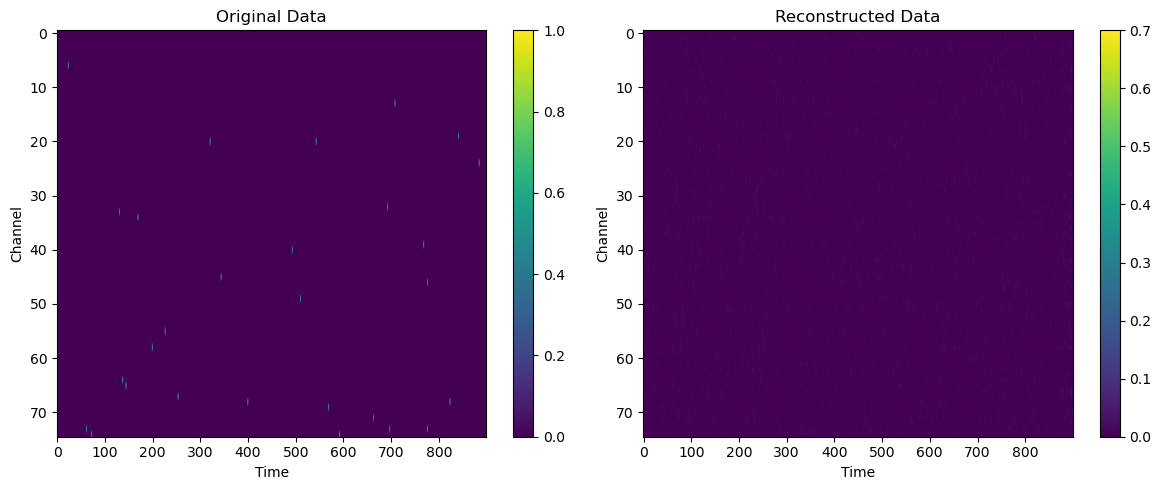

In [45]:
random_indices = torch.randint(0, stacked_data.shape[0], (1,))
selected_data = stacked_data[random_indices]

with torch.no_grad():
    recon_data, mu, logvar = model(selected_data)
    
    if len(selected_data.shape) == 3:
        selected_data = selected_data.unsqueeze(1)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.imshow(selected_data[0, 0].cpu().numpy(), aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title('Original Data')
    plt.xlabel('Time')
    plt.ylabel('Channel')
    
    plt.subplot(122)
    plt.imshow(recon_data[0, 0].cpu().numpy(), aspect='auto', cmap='viridis', vmax=0.7, vmin=0)
    plt.colorbar()
    plt.title('Reconstructed Data')
    plt.xlabel('Time')
    plt.ylabel('Channel')
    
    plt.tight_layout()
    plt.show()

### 1D

torch.Size([1, 75, 6])


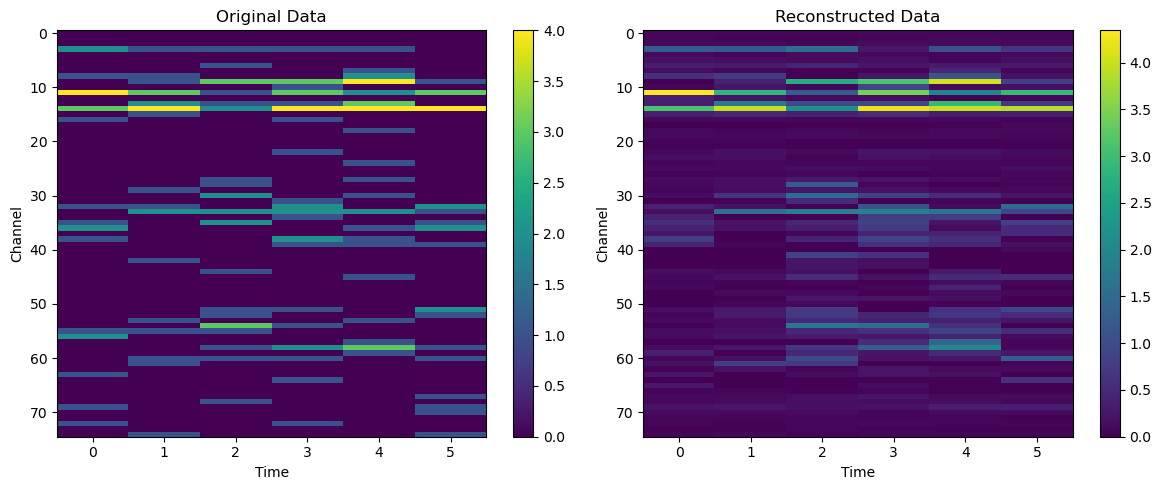

In [40]:
random_indices = torch.randint(0, stacked_data.shape[0], (1,))
selected_data = stacked_data[random_indices]
print(selected_data.shape)
with torch.no_grad():
    latent_embeddings, _ = model.encode(selected_data)
    reconstructed_data = model.decode(latent_embeddings)

plt.figure(figsize=(12, 5))

# Original data
plt.subplot(121)
plt.imshow(selected_data[0].cpu().numpy(), aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Original Data')
plt.xlabel('Time')
plt.ylabel('Channel')

# Reconstructed data 
plt.subplot(122)
plt.imshow(reconstructed_data[0].cpu().numpy(), aspect='auto', cmap='viridis', vmin=0)
plt.colorbar()
plt.title('Reconstructed Data')
plt.xlabel('Time')
plt.ylabel('Channel')

plt.tight_layout()
plt.show()

### Binary - use sample input data

In [67]:
# Create output directory if it doesn't exist
os.makedirs("visualization_results", exist_ok=True)

# Generate and visualize model outputs
for i in range(1, 6):
    # Load input data
    input_path = os.path.join("model_outputs_binary", f"input_{i}.pt")
    input_data = torch.load(input_path).to(device).float() # Convert to float32
    input_data = input_data.squeeze()
    
    # Generate reconstruction using model
    with torch.no_grad():
        latent_embeddings, _ = model.encode(input_data.unsqueeze(0))
        output_data = model.decode(latent_embeddings)
        
        # Save output data
        output_path = os.path.join("model_outputs_binary", f"output_{i}.pt")
        torch.save(output_data, output_path)
    
    # # Convert to numpy arrays for plotting
    # input_data = input_data.cpu().numpy()
    # output_data = output_data[0].cpu().numpy()
    
    # print(f"Sample {i} input shape:", input_data.shape)
    # print(f"Sample {i} output shape:", output_data.shape)
    
    # # Plot comparison
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # # Plot input data
    # im1 = ax1.imshow(input_data, aspect='auto', interpolation='nearest', cmap='gray_r')
    # ax1.set_title('30ms Binary Input Data')
    # ax1.set_xlabel('Time (ms)')
    # # Set x-axis ticks to show time in ms
    # xticks = ax1.get_xticks()
    # ax1.set_xticks(xticks)
    # ax1.set_xticklabels([f'{int(x)}' for x in xticks/30])
    # ax1.set_xlim(0, input_data.shape[1])
    # ax1.text(input_data.shape[1], -1, '30ms', ha='right')
    # ax1.set_ylabel('Channels')
    # plt.colorbar(im1, ax=ax1)
    
    # # Plot output data
    # im2 = ax2.imshow(output_data, aspect='auto', interpolation='nearest', cmap='gray_r', vmin=0, vmax=0.018)
    # ax2.set_title('Reconstructed Data by 1D VAE')
    # ax2.set_xlabel('Time (ms)')
    # # Set x-axis ticks to show time in ms
    # xticks = ax2.get_xticks()
    # ax2.set_xticks(xticks)
    # ax2.set_xticklabels([f'{int(x)}' for x in xticks/30])
    # ax2.set_xlim(0, output_data.shape[1])
    # ax2.set_ylabel('Channels')
    # plt.colorbar(im2, ax=ax2, ticks=np.arange(0, 0.018+0.0025, 0.0025))
    
    # plt.tight_layout()
    
    # # Save plot
    # plt.savefig(os.path.join("visualization_results", f"comparison_{i}.png"))
    # plt.close()

C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\2520125035.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conv

In [94]:
# Create output directory if it doesn't exist
os.makedirs("visualization_results/1d_neural_binary_vae", exist_ok=True)

for i in range(1, 6):
    # Load input data
    input_path = os.path.join("model_outputs_binary", f"input_{i}.pt")
    input_data = torch.load(input_path).to(device).float() # Convert to float32
    input_data = input_data.squeeze()

    # Load output data
    output_path = os.path.join("model_outputs_binary", f"output_{i}.pt")
    output_data = torch.load(output_path).to(device).float()
    output_data = output_data[0].squeeze()

    # Convert to numpy arrays for plotting
    input_data = input_data.cpu().numpy()
    output_data = output_data.cpu().numpy()

    print(f"Sample {i} input shape:", input_data.shape)
    print(f"Sample {i} output shape:", output_data.shape)

    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

    # Plot input data
    im1 = ax1.imshow(input_data, aspect='auto', interpolation='nearest', cmap='gray_r')
    ax1.set_title('Original Data')
    ax1.set_xlabel('Time (ms)')
    # Set x-axis ticks to show time in ms
    xticks = ax1.get_xticks()
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([f'{int(x)}' for x in xticks/30])
    ax1.set_xlim(0, input_data.shape[1])
    ax1.text(input_data.shape[1], -1, '30ms', ha='right')
    ax1.set_ylabel('Neuron')
    plt.colorbar(im1, ax=ax1)

    # Plot output data
    im2 = ax2.imshow(output_data, aspect='auto', interpolation='nearest', cmap='gray_r', vmin=0,vmax=0.001)
    ax2.set_title('Reconstructed Data')
    ax2.set_xlabel('Time (ms)')
    # Set x-axis ticks to show time in ms
    xticks = ax2.get_xticks()
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([f'{int(x)}' for x in xticks/30])
    ax2.set_xlim(0, output_data.shape[1])
    ax2.set_ylabel('Neuron')
    plt.colorbar(im2, ax=ax2, ticks=[0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001]) # Simplified colorbar with fewer ticks

    plt.tight_layout()
    
    # Save plot as high resolution PDF
    plt.savefig(os.path.join("visualization_results/1d_neural_binary_vae", f"comparison_{i}.pdf"), dpi=1200, format='pdf')
    plt.close()

C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\3635173167.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conv

Sample 1 input shape: (75, 900)
Sample 1 output shape: (75, 900)


C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\3635173167.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conv

Sample 2 input shape: (75, 900)
Sample 2 output shape: (75, 900)


C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\3635173167.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conv

Sample 3 input shape: (75, 900)
Sample 3 output shape: (75, 900)


C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\3635173167.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conv

Sample 4 input shape: (75, 900)
Sample 4 output shape: (75, 900)


C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\3635173167.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conv

Sample 5 input shape: (75, 900)
Sample 5 output shape: (75, 900)


### 2D Binary

In [44]:
# Create output directory if it doesn't exist
os.makedirs("visualization_results", exist_ok=True)

# Generate and visualize model outputs
for i in range(1, 6):
    # Load input data
    input_path = os.path.join("model_outputs", f"input_{i}.pt")
    input_data = torch.load(input_path).to(device).float() # Convert to float32
    input_data = input_data.squeeze()
    
    # Generate reconstruction using model
    with torch.no_grad():
        latent_embeddings, _ = model.encode(input_data.unsqueeze(0))
        output_data = model.decode(latent_embeddings)
        
        # Save output data
        output_path = os.path.join("model_outputs", f"output_{i}.pt")
        torch.save(output_data, output_path)
    
    # Convert to numpy arrays for plotting
    input_data = input_data.cpu().numpy()
    output_data = output_data[0].cpu().numpy()
    
    # Ensure output_data is 2D by squeezing extra dimensions
    output_data = np.squeeze(output_data)
    
    print(f"Sample {i} input shape:", input_data.shape)
    print(f"Sample {i} output shape:", output_data.shape)
    
    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot input data
    im1 = ax1.imshow(input_data, aspect='auto', interpolation='nearest', cmap='gray_r')
    ax1.set_title('30ms Binary Input Data')
    ax1.set_xlabel('Time (ms)')
    # Set x-axis ticks to show time in ms
    xticks = ax1.get_xticks()
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([f'{int(x)}' for x in xticks/30])
    ax1.set_xlim(0, input_data.shape[1])
    ax1.text(input_data.shape[1], -1, '30ms', ha='right')
    ax1.set_ylabel('Channels')
    plt.colorbar(im1, ax=ax1)
    
    # Plot output data
    im2 = ax2.imshow(output_data, aspect='auto', interpolation='nearest', cmap='gray_r', vmin=0, vmax=0.018)
    ax2.set_title('Reconstructed Data by 2D VAE')
    ax2.set_xlabel('Time (ms)')
    # Set x-axis ticks to show time in ms
    xticks = ax2.get_xticks()
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([f'{int(x)}' for x in xticks/30])
    ax2.set_xlim(0, output_data.shape[1])
    ax2.set_ylabel('Channels')
    plt.colorbar(im2, ax=ax2, ticks=np.arange(0, 0.018+0.0025, 0.0025))
    
    plt.tight_layout()
    
    # Save plot before showing it
    plt.savefig(os.path.join("visualization_results", f"2d_comparison_{i}.png"))
    plt.show()
    plt.close()

C:\Users\askrb\AppData\Local\Temp\ipykernel_8196\154186803.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  input_data = torch.load(input_path).to(device).float() # Conve

FileNotFoundError: [Errno 2] No such file or directory: 'model_outputs\\input_1.pt'

# Evaluation

In [42]:
def evaluate_reconstruction(model, data_loader, device):
    model.eval()
    total_mse = 0
    total_relative_error = 0
    n_samples = 0
    
    with torch.no_grad():
        for batch in data_loader:
            if isinstance(batch, (list, tuple)):
                x = batch[0]
            else:
                x = batch
            x = x.float().to(device)
            
            if len(x.shape) == 3 and isinstance(model, VAE2D):
                x = x.unsqueeze(1)
            
            recon, mu, logvar = model(x)

            mse = F.mse_loss(recon, x, reduction='mean')
            
            # use data range to normalize, avoid division by a value close to 0
            data_range = torch.max(x) - torch.min(x) # this was added
            relative_error = torch.mean(torch.abs(recon - x)) / data_range * 100  # convert to percentage
            
            total_mse += mse.item()
            total_relative_error += relative_error.item()
            n_samples += 1
    
    avg_mse = total_mse / n_samples
    rmse = np.sqrt(avg_mse)
    avg_relative_error = total_relative_error / n_samples
    
    return {
        'MSE': avg_mse,
        'RMSE': rmse,
        'Relative_Error(%)': avg_relative_error
    }

In [43]:
metrics = evaluate_reconstruction(model, dataloader, device)
print("\nReconstruction Quality Metrics:")
print(f"MSE: {metrics['MSE']:.6f}")
print(f"RMSE: {metrics['RMSE']:.6f}")
print(f"Relative Error: {metrics['Relative_Error(%)']:.6f}")


Reconstruction Quality Metrics:
MSE: 0.104166
RMSE: 0.322747
Relative Error: 2.627314


2D Padded All:

Reconstruction Quality Metrics:
MSE: 0.181963
RMSE: 0.426572
Relative Error: 10494656.500000

2D Warpped Label 2:


Reconstruction Quality Metrics:
MSE: 0.221293
RMSE: 0.470418
Relative Error: 4.431530


1D:


Reconstruction Quality Metrics:
MSE: 0.114443
RMSE: 0.338295
Relative Error: 1.642250

1D Warpped, label 2 only:

Reconstruction Quality Metrics:
MSE: 0.058498
RMSE: 0.241864
Relative Error: 1.740921



1D: label 2 only

Reconstruction Quality Metrics:
MSE: 0.033453
RMSE: 0.182903
Relative Error: 0.987591

1D: all labels

Reconstruction Quality Metrics:
MSE: 0.104166
RMSE: 0.322747
Relative Error: 2.627314

In [52]:
def get_latent_embeddings(model, dataloader, device):
    model.eval()
    latent_embeddings = []
    
    # Create a sequential dataloader with no shuffling
    sequential_dataloader = torch.utils.data.DataLoader(
        dataloader.dataset,
        batch_size=dataloader.batch_size,
        shuffle=False,
        num_workers=dataloader.num_workers
    )
    
    with torch.no_grad():
        for batch in sequential_dataloader:
            if isinstance(batch, (list, tuple)):
                x = batch[0]
            else:
                x = batch
            x = x.float().to(device)
            
            if len(x.shape) == 3 and isinstance(model, VAE2D):
                x = x.unsqueeze(1)
            
            mu, _ = model.encode(x)
            latent_embeddings.append(mu.cpu())
    
    return torch.cat(latent_embeddings, dim=0)

neural_embeddings = get_latent_embeddings(model, dataloader, device)
print(f"Shape of neural embeddings: {neural_embeddings.shape}")
torch.save(neural_embeddings, 'training_data/embedding_1dvae_warpped_neural.pt')

Shape of neural embeddings: torch.Size([3459, 32])


# Use same result for encodec to plot

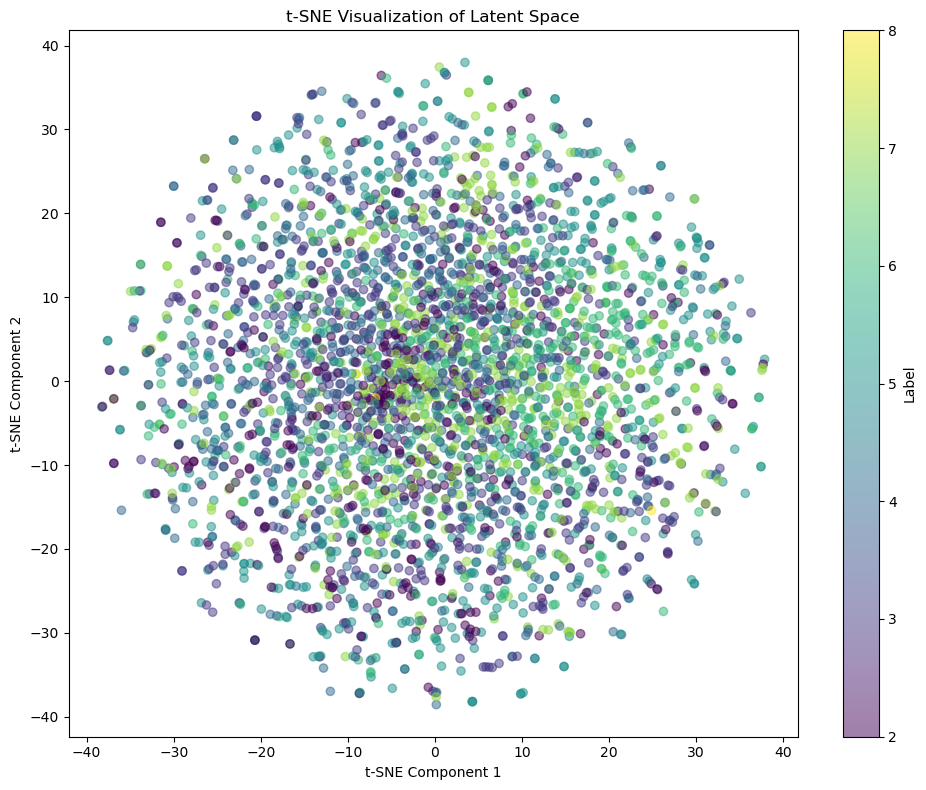

In [42]:
# Get latent embeddings for all data
with torch.no_grad():
    latent_embeddings, _ = model.encode(stacked_data)

# Convert to numpy for t-SNE
latent_np = latent_embeddings.cpu().numpy()

# Perform t-SNE dimensionality reduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_np)

# Create scatter plot of t-SNE results colored by labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], 
                     c=stacked_labels.cpu().numpy(), 
                     cmap='viridis',
                     alpha=0.5)
plt.title('t-SNE Visualization of Latent Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Label')
plt.tight_layout()
plt.show()

In [34]:
# Get indices for first 5 and last 5 samples
indices = list(range(5)) + list(range(len(stacked_data)-5, len(stacked_data)))

for i, idx in enumerate(indices, 1):
    try:
        # Get data from stacked_data without shuffling
        input_data = stacked_data[idx].cpu().squeeze(0).numpy()  # Get sample at idx
        
        # Get reconstruction through model
        with torch.no_grad():
            model.eval()
            output_data = model(stacked_data[idx].unsqueeze(0).to(device))
            if isinstance(output_data, tuple):
                output_data = output_data[0]  # Get reconstruction if model returns multiple values
            output_data = output_data.cpu().squeeze(0).numpy()
        
        print(f"Input shape: {input_data.shape}")
        print(f"Output shape: {output_data.shape}")
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
        
        # Get global min and max for consistent colorbar
        vmin = 0
        vmax = max(input_data.max(), output_data.max())
        
        # Plot input data
        im1 = ax1.imshow(input_data, aspect='auto', interpolation='nearest', cmap='viridis',
                        vmin=vmin, vmax=vmax)
        ax1.set_title('Input Data')
        ax1.set_xlabel('Time (ms)')
        # Set x-axis ticks to show time in ms
        xticks = ax1.get_xticks()
        ax1.set_xticks(xticks)
        ax1.set_xticklabels([f'{int(x*10)}' for x in xticks])  # Multiply by 10 for ms
        ax1.set_xlim(0, input_data.shape[1])  # Show full range
        ax1.set_ylabel('Neuron')
        plt.colorbar(im1, ax=ax1)
        
        # Plot output data
        im2 = ax2.imshow(output_data, aspect='auto', interpolation='nearest', cmap='viridis',
                        vmin=vmin, vmax=vmax)
        ax2.set_title('Reconstructed Data')
        ax2.set_xlabel('Time (ms)')
        # Set x-axis ticks to show time in ms
        xticks = ax2.get_xticks()
        ax2.set_xticks(xticks)
        ax2.set_xticklabels([f'{int(x*10)}' for x in xticks])  # Multiply by 10 for ms
        ax2.set_xlim(0, output_data.shape[1])  # Show full range
        ax2.set_ylabel('Neuron')
        plt.colorbar(im2, ax=ax2)
        
        plt.tight_layout()
        
        # Create directory if it doesn't exist
        save_dir = os.path.join("visualization_results", "1d_neural_binned_vae")
        os.makedirs(save_dir, exist_ok=True)
        
        # Save the figure as PDF with high DPI
        save_path = os.path.join(save_dir, f"comparison_{i}.pdf")
        plt.savefig(save_path, format='pdf', dpi=1200)
        plt.close()
        
    except Exception as e:
        print(f"Error processing sample {i}: {e}")

Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
Input shape: (75, 27)
Output shape: (75, 27)
